In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('#datasetlink', encoding='unicode_escape')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
df.shape

(11251, 13)

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11246    False
11247    False
11248    False
11249    False
11250    False
Length: 11251, dtype: bool

In [ ]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis

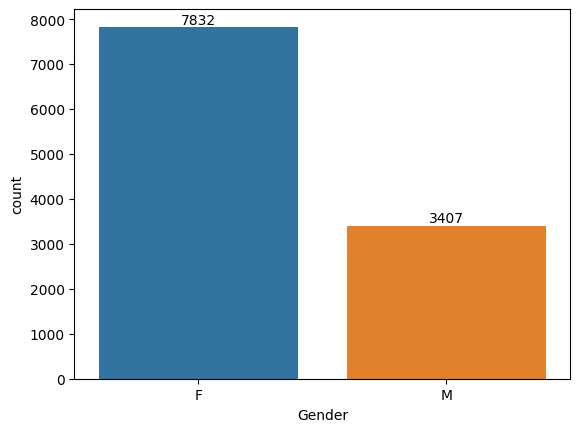

In [ ]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

GENDER vs Total Amount

<Axes: xlabel='Gender', ylabel='Amount'>

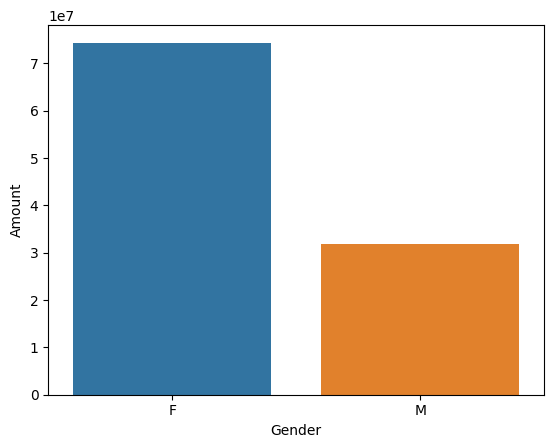

In [ ]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

Age

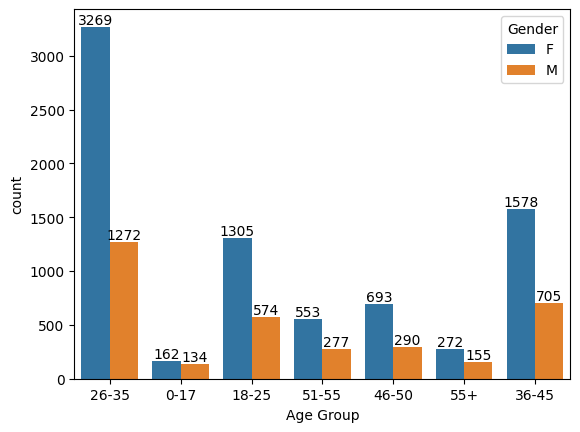

In [ ]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

Total Amount vs Age Group

<Axes: xlabel='Age Group', ylabel='Amount'>

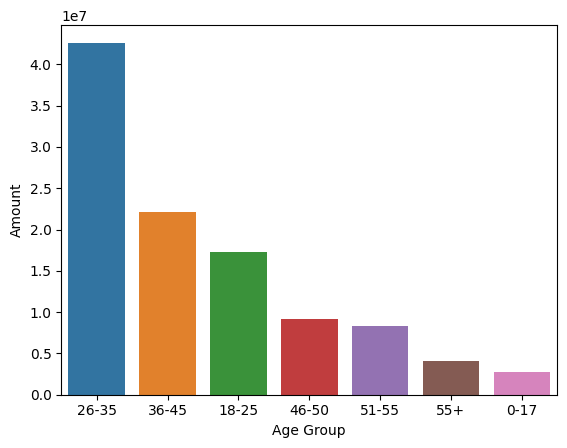

In [ ]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

<Axes: xlabel='State', ylabel='Orders'>

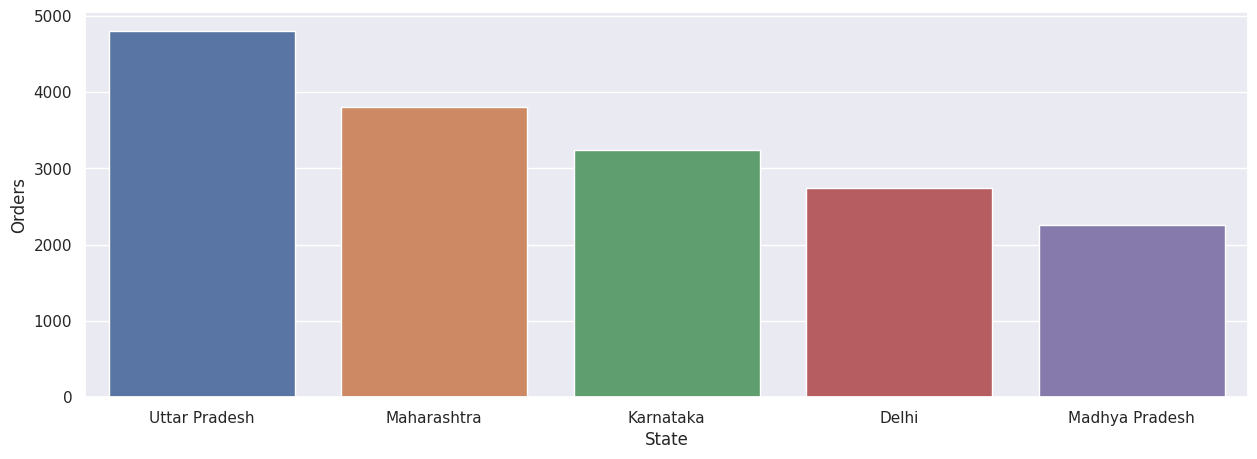

In [ ]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders', data=sales_state)

# total amount/sales from top 10 states

<Axes: xlabel='State', ylabel='Amount'>

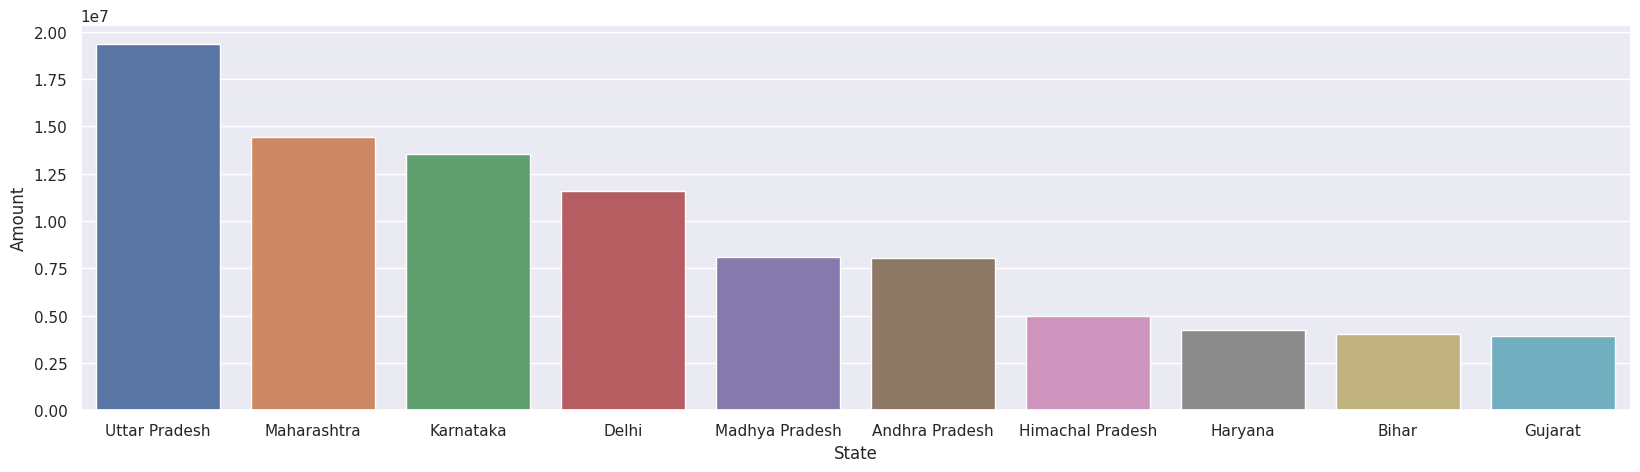

In [ ]:
sales_amount= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=sales_amount)

Maritial Status

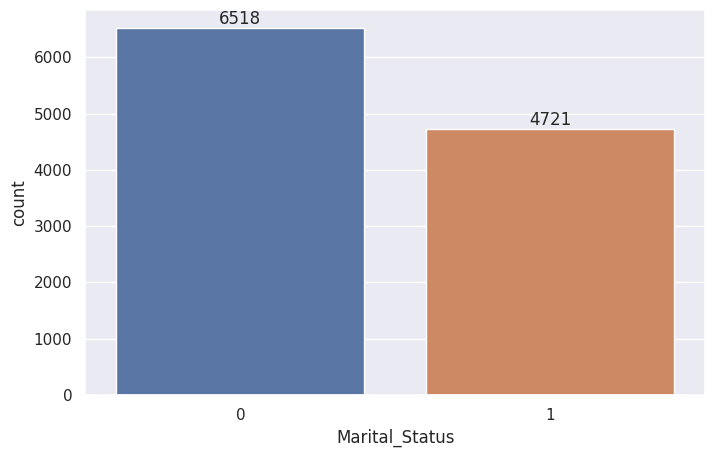

In [ ]:
ax=sns.countplot(data=df,x='Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
  ax.bar_label(bars)

Occupation

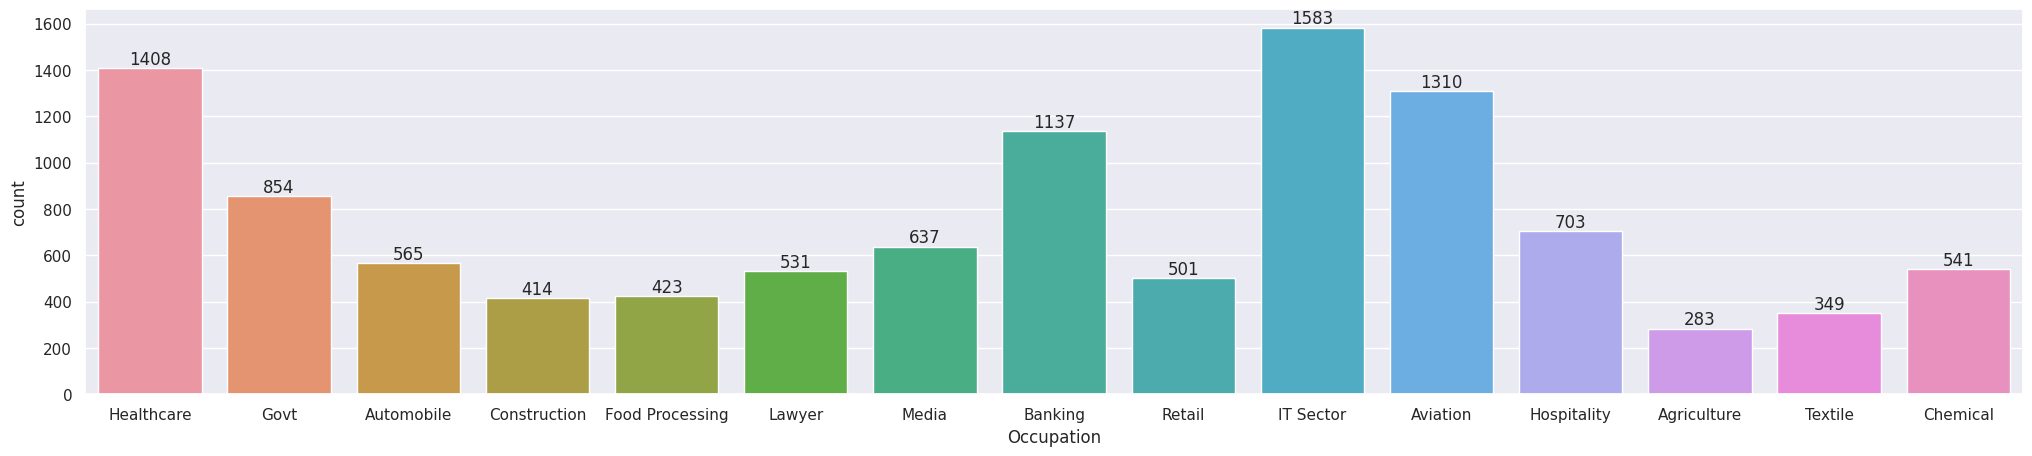

In [ ]:
ax=sns.countplot(data=df, x='Occupation')
sns.set(rc={'figure.figsize':(22,5)})
for bars in ax.containers:
  ax.bar_label(bars)

Occupation vs Amount

<Axes: xlabel='Occupation', ylabel='Amount'>

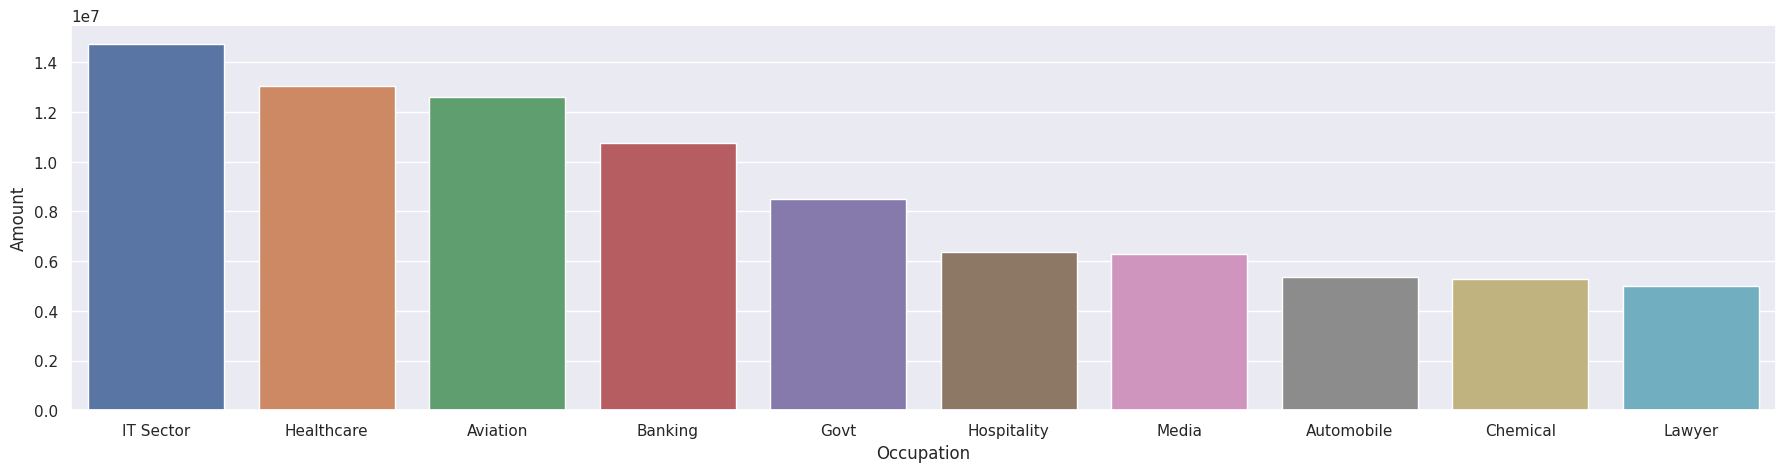

In [ ]:
sales_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=sales_occupation,x='Occupation',y='Amount')

Product Category

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

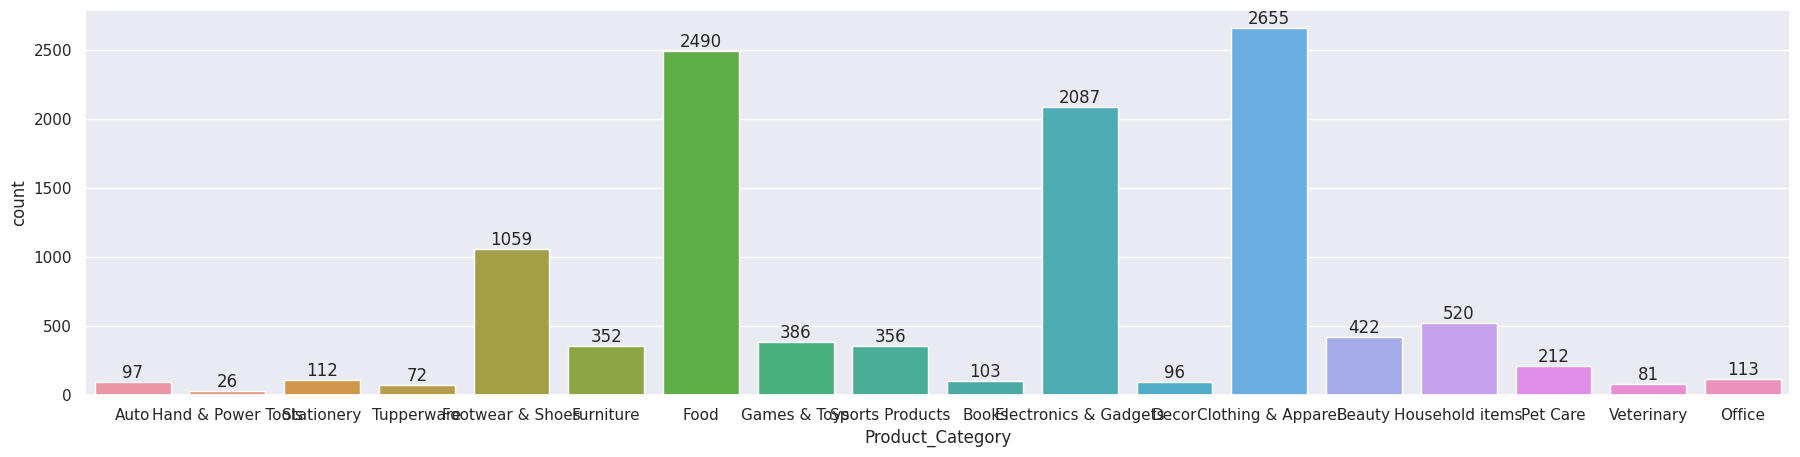

In [ ]:
ax=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

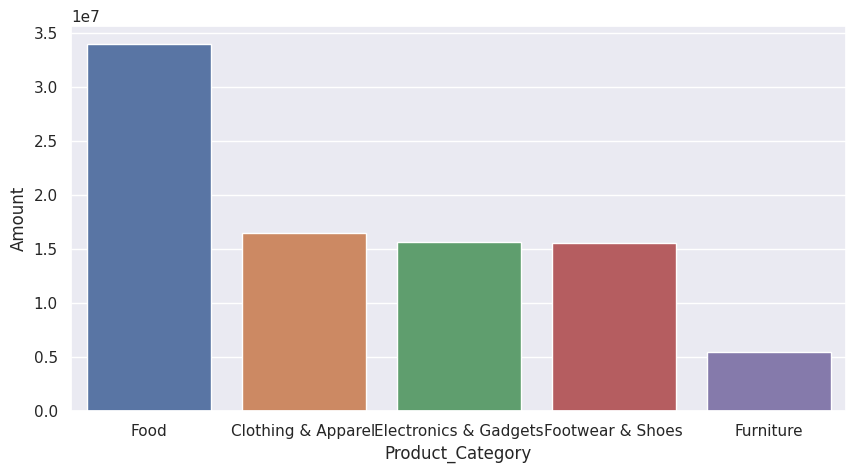

In [ ]:
sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Product_Category',y='Amount',data=sales_product)

<Axes: xlabel='Product_ID', ylabel='Orders'>

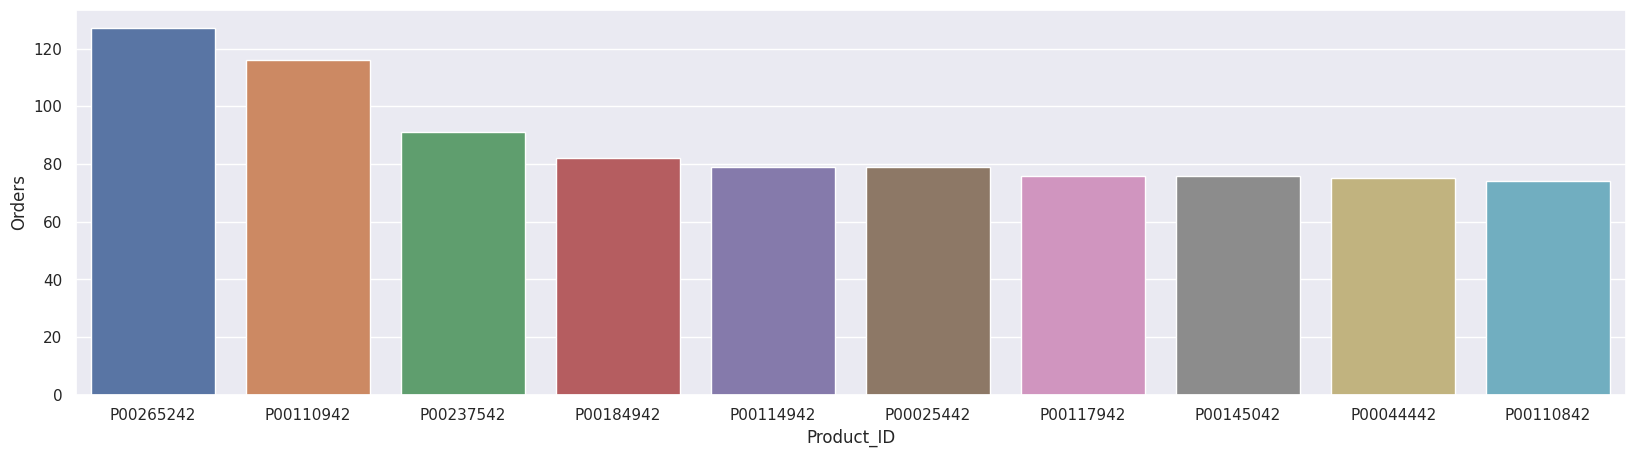

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')